### Predicting dog lifespan 

In [12]:
import keras 
import tensorflow
import pandas as pd
import tensorflow.keras as kr

In [15]:
import numpy as np
import io
import requests
url="https://raw.githubusercontent.com/ianmcloughlin/datasets/master/dogs.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8'))) 
df

,pure,age,weight,height,lifespan
0,True,3,7.94,49.6,15
1,True,7,5.05,63.5,17
2,True,6,16.15,68.2,11
3,False,3,15.50,64.7,12
4,False,3,12.17,59.7,14
...,...,...,...,...,...
95,False,4,20.76,52.2,10
96,False,4,17.40,47.5,11
97,False,6,15.60,51.4,12
98,False,3,8.37,54.1,16


In [16]:
# Need to convert the booleans in the first row
# For a categorical variable
# Neural Nets dont like categoricals or booleans

# return a list of true false values as 0/1 integers:
df ['ispure'] = (df['pure']== True).astype(np.int) # asks is each of the values == True
df ['isnotpure'] = (df['pure']== False).astype(np.int) 

# ispure and isnotpure essentially encode the same thing and one would do for
# the network but we'll go with the two anyway
df

,pure,age,weight,height,lifespan,ispure,isnotpure
0,True,3,7.94,49.6,15,1,0
1,True,7,5.05,63.5,17,1,0
2,True,6,16.15,68.2,11,1,0
3,False,3,15.50,64.7,12,0,1
4,False,3,12.17,59.7,14,0,1
...,...,...,...,...,...,...,...
95,False,4,20.76,52.2,10,0,1
96,False,4,17.40,47.5,11,0,1
97,False,6,15.60,51.4,12,0,1
98,False,3,8.37,54.1,16,0,1


In [8]:
# Create df of inputs:

inputs = df[['age','weight','height','ispure', 'isnotpure' ]]
inputs

,age,weight,height,ispure,isnotpure
0,3,7.94,49.6,1,0
1,7,5.05,63.5,1,0
2,6,16.15,68.2,1,0
3,3,15.50,64.7,0,1
4,3,12.17,59.7,0,1
...,...,...,...,...,...
95,4,20.76,52.2,0,1
96,4,17.40,47.5,0,1
97,6,15.60,51.4,0,1
98,3,8.37,54.1,0,1


So, looking at the first input and output rows: What we want is:
- when our inputs are: 3,7.94,49.6,1,0 (row 0)
- our output SHOULD be: 15 (row 0)

NN's take this list of inputs and produce one output...So let's do that now:

In [17]:
output = df['lifespan']
output

0     15
1     17
2     11
3     12
4     14
      ..
95    10
96    11
97    12
98    16
99    14
Name: lifespan, Length: 100, dtype: int64

In [72]:
# fire up our NN:

m = kr.models.Sequential() # create "blank" NN 

m.add(kr.layers.Dense(10, input_dim =5, activation='linear')) # always make the input dim amount the same as your IV's amount
m.add(kr.layers.Dense(30, activation='sigmoid')) 
m.add(kr.layers.Dense(10, activation='linear')) # middle layer
m.add(kr.layers.Dense(10, activation='linear')) 
m.add(kr.layers.Dense(1, activation='linear')) 

m.compile(loss='mse', optimizer='adam') # mse = mean square error


In [73]:
m.fit(inputs,output, epochs=10, batch_size=10)

Train on 100 samples
Epoch 1/10
100/100 [==============================] - 0s 3ms/sample - loss: 1056.8549
Epoch 2/10
100/100 [==============================] - 0s 210us/sample - loss: 746.5612
Epoch 3/10
100/100 [==============================] - 0s 300us/sample - loss: 492.1039
Epoch 4/10
100/100 [==============================] - 0s 320us/sample - loss: 306.7988
Epoch 5/10
100/100 [==============================] - 0s 300us/sample - loss: 174.2185
Epoch 6/10
100/100 [==============================] - 0s 330us/sample - loss: 88.2531
Epoch 7/10
100/100 [==============================] - 0s 230us/sample - loss: 43.5573
Epoch 8/10
100/100 [==============================] - 0s 360us/sample - loss: 26.2052
Epoch 9/10
100/100 [==============================] - 0s 260us/sample - loss: 21.2575
Epoch 10/10
100/100 [==============================] - 0s 410us/sample - loss: 20.9565


In [74]:
# show me the predictions for all my input values
p = m.predict(inputs) # predict on the inputs (trained on the inputs)

In [75]:
p

array([[ 9.736402 ],
       [10.389143 ],
       [15.540645 ],
       [15.043634 ],
       [13.030772 ],
       [ 9.351261 ],
       [10.631618 ],
       [12.917597 ],
       [11.365661 ],
       [15.215171 ],
       [14.290494 ],
       [ 9.417403 ],
       [13.885721 ],
       [12.313557 ],
       [11.98933  ],
       [13.881064 ],
       [ 8.36671  ],
       [12.885117 ],
       [12.798228 ],
       [16.818209 ],
       [12.542617 ],
       [13.459975 ],
       [ 9.038718 ],
       [14.346199 ],
       [15.820327 ],
       [12.32967  ],
       [10.838526 ],
       [12.709823 ],
       [ 8.352098 ],
       [14.788654 ],
       [13.930247 ],
       [14.885603 ],
       [12.478488 ],
       [ 7.557823 ],
       [14.379173 ],
       [11.14324  ],
       [10.261701 ],
       [10.978693 ],
       [14.268152 ],
       [11.863959 ],
       [12.782398 ],
       [12.619789 ],
       [12.170157 ],
       [12.842105 ],
       [11.217465 ],
       [13.890505 ],
       [10.940453 ],
       [16.73

In [66]:
output.as_matrix()

C:\Users\Gareth Duffy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([15, 17, 11, 12, 14, 12, 15, 11, 13, 10, 12, 17, 10, 14, 12, 11, 16,
       12, 11, 10, 12, 11, 15, 11, 11, 14, 15, 11, 17, 10, 10, 11, 11, 19,
        8, 13, 16, 14, 10, 12, 12, 14, 10, 13, 14, 11, 15, 10, 15, 12, 13,
       12, 10, 11, 10, 11, 10, 14, 10, 11, 11, 11, 13, 19, 14, 14,  8, 12,
       11, 11, 11, 16, 13, 12, 12, 18, 12, 16, 11,  8,  8, 12, 18,  9, 16,
       13,  9, 16,  9, 11, 16, 13,  8, 14, 15, 10, 11, 12, 16, 14],
      dtype=int64)

In [76]:
# .T transposes into a list
# print out the mse:
np.sqrt(np.sum(m.predict(inputs).T - output.as_matrix())**2) # outputs the differences

C:\Users\Gareth Duffy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


2.8272018432617188

mean sq error: The difference between what the NN is predicting and the actual values i want to predict



comapare the output matrix values to the m.predict(inputs) and thats how you know how accurate it is (loss functio too should be approaching 0)

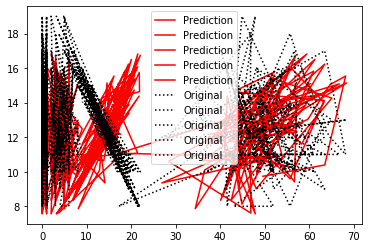

In [77]:
# Output or predicted vs original as plots:
import matplotlib.pyplot as plt

plt.plot(inputs, p, 'r-', label='Prediction')
plt.plot(inputs, output, 'k:', label='Original')
plt.legend()